In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

In [87]:
df = pd.read_csv("titanic_train.csv")

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

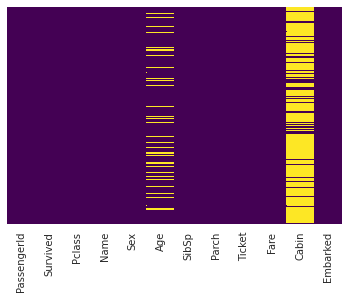

In [92]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [93]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

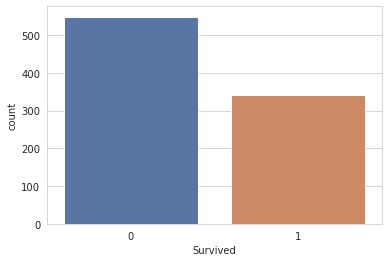

In [94]:
sns.countplot(x="Survived", data=df, palette="deep")

<AxesSubplot:xlabel='Survived', ylabel='count'>

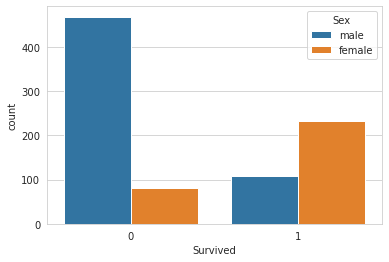

In [95]:
sns.countplot(x="Survived", hue="Sex", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

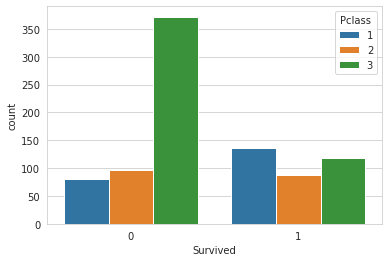

In [96]:
sns.countplot(x="Survived", hue="Pclass", data=df)

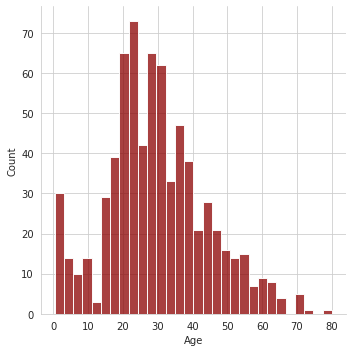

In [97]:
sns.displot(df["Age"].dropna(), kde=False, color="darkred", bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

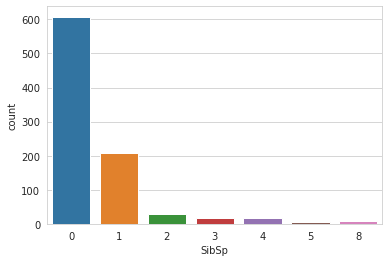

In [98]:
sns.countplot(x="SibSp", data=df)

<AxesSubplot:>

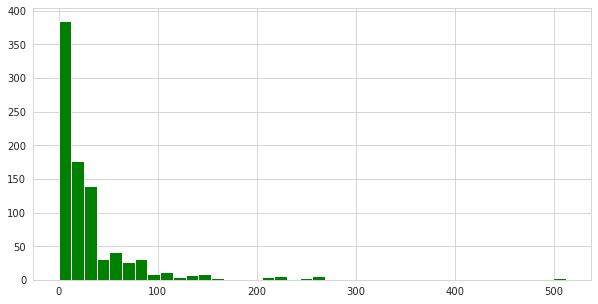

In [99]:
df["Fare"].hist(color="green", bins=40, figsize=(10,5))

In [100]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

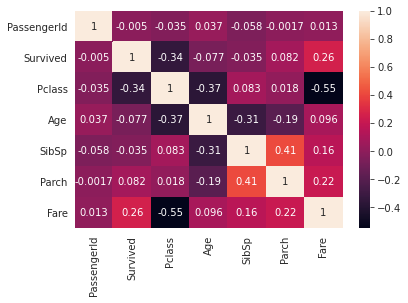

In [101]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

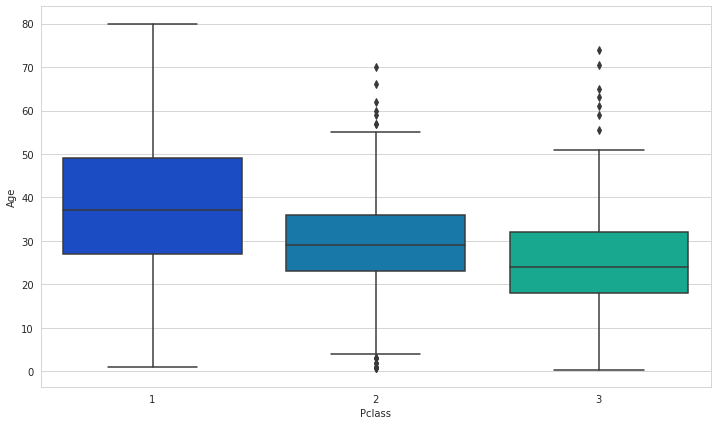

In [102]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=df, palette="winter")

In [103]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [104]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis=1)

<AxesSubplot:>

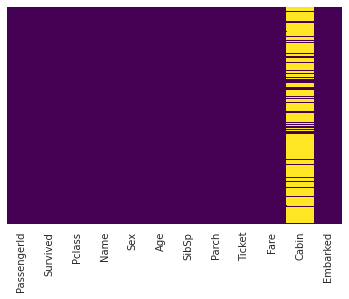

In [105]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [106]:
df.drop(columns=["Cabin"], axis=1, inplace=True)

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
df.dropna(inplace=True)

In [109]:
df.shape

(889, 11)

In [110]:
sex = pd.get_dummies(df["Sex"], drop_first=True)
embark = pd.get_dummies(df["Embarked"], drop_first=True)

In [111]:
df.drop(columns=["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [112]:
df = pd.concat([df, sex, embark], axis=1)

In [113]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [114]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [116]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [117]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
model.score(X_test, y_test)

0.8014981273408239

In [119]:
y_pred = model.predict(X_test)

In [120]:
scores = cross_val_score(model, X_test, y_test, cv=10)

In [124]:
print("Cross-Validation Accuracy Scores:", scores.mean())

Cross-Validation Accuracy Scores: 0.8125356125356126


In [132]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       164
           1       0.75      0.73      0.74       103

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



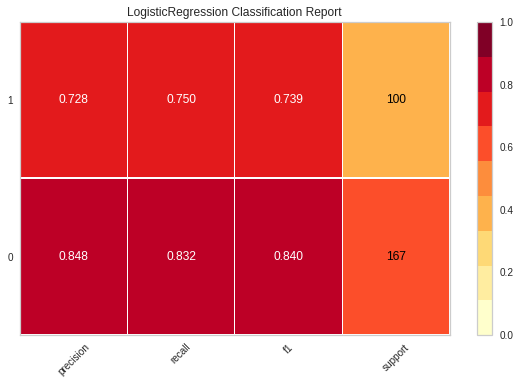

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [133]:
visualizer = ClassificationReport(model, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [134]:
cnf_matrix = confusion_matrix(y_test, y_pred)

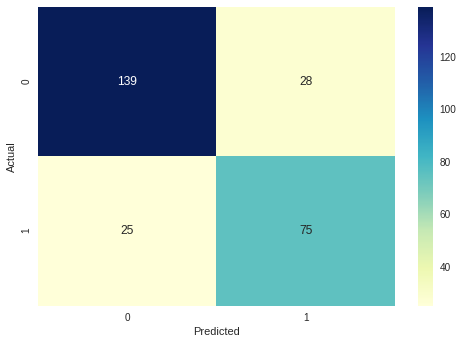

In [135]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,
            cmap="YlGnBu", fmt="g")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()